In [1]:
! pip install matplotlib numpy pandas sklearn scipy seaborn

In [4]:
!pip install openpyxl

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import math
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from scipy.stats import sigmaclip

In [7]:
import os
os.getcwd()

'C:\\Users\\alekc\\Desktop\\Learning\\Archive\\4 семестр\\Анализ'

## Считывание даных под вариант

In [9]:
data_frame: pandas.DataFrame = pandas.ExcelFile('first_practice_dataframe.xlsx').parse('Sheet1')
data = data_frame[['cat8_motivesForTravelling', 'cat6_brandOfSoaps', 'num1_16', 'num2_16', 'num3_16']]

In [10]:
data

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
0,Health,lux,873.769790,483.814054,116.806927
1,Study,NaN,720.562227,211.321139,98.26433
2,Family,Lux,1039.114671,244.149817,NaN
3,Health,lux,712.038677,82.090022,116.613291
4,Health,Dove,864.677412,NaN,146.187875
...,...,...,...,...,...
995,Leisure,Dove,678.416987,NaN,94.634025
996,Health,lux,974.740058,259.813573,140.970704
997,Study,Dove,752.479092,87.352380,120.055689
998,Health,Lux,847.430677,296.909229,NaN


## Визуализация количественных признаков

In [11]:
def illustrate_quantity_series(info: pandas.Series, bins_number=40):
    f, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.histplot(data=info, bins=bins_number, kde=True, ax=axes[0], color='salmon')

    sns_plot = sns.boxplot(info, ax=axes[1], color='orange')

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


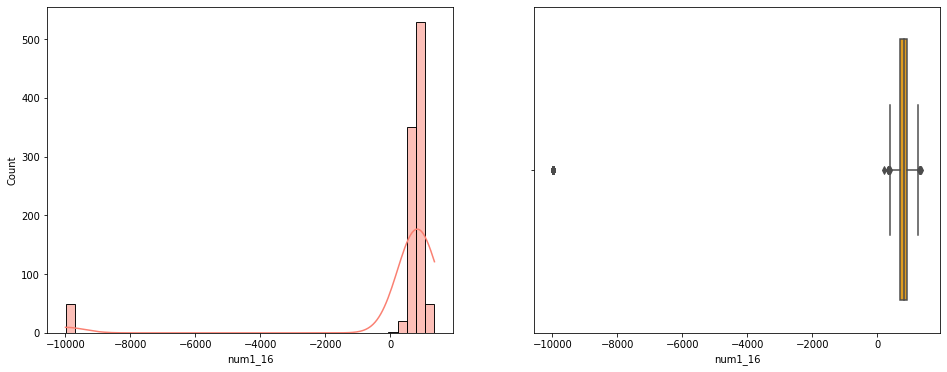

In [12]:
illustrate_quantity_series(data['num1_16'], bins_number=40)

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


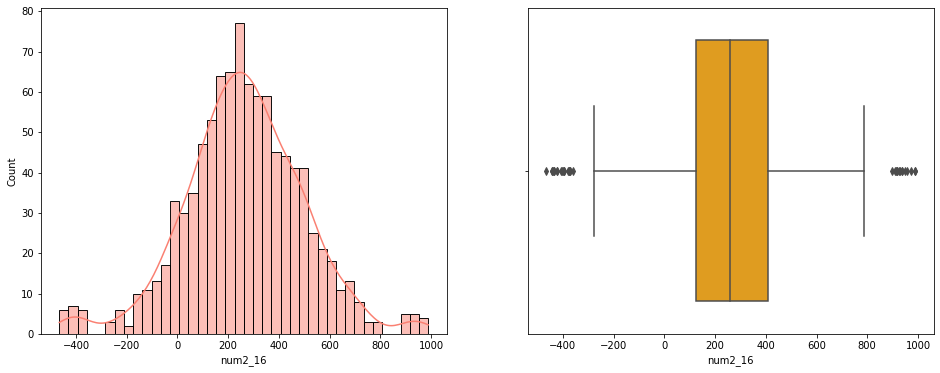

In [13]:
illustrate_quantity_series(data['num2_16'], bins_number=40)

Сейчас будет ошибка

ValueError: Unable to parse string "-" at position 7

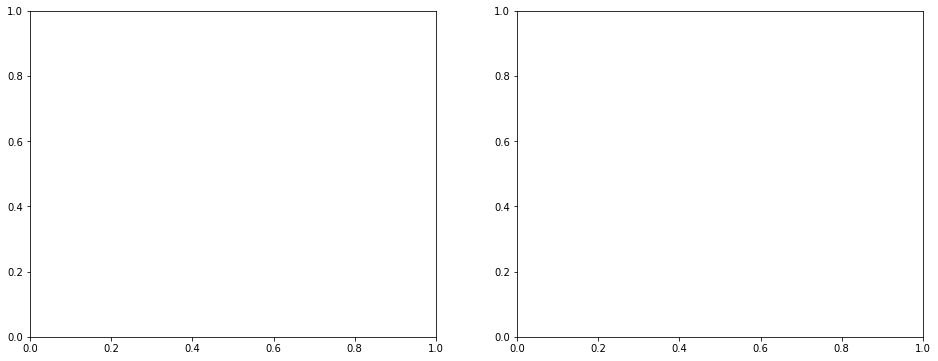

In [14]:
illustrate_quantity_series(data['num3_16'], bins_number=40)

## Визуализация качественных признаков

In [15]:
def illustrate_qualitative_series(info: pandas.Series):
    values_frequency = info.value_counts(sort=False)

    numbers = values_frequency.to_list()
    names = values_frequency.index.to_list()

    f, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].pie(numbers, labels=names, autopct='%1.1f%%')

    axes[1].bar(names, numbers, facecolor='salmon')

    plt.show()

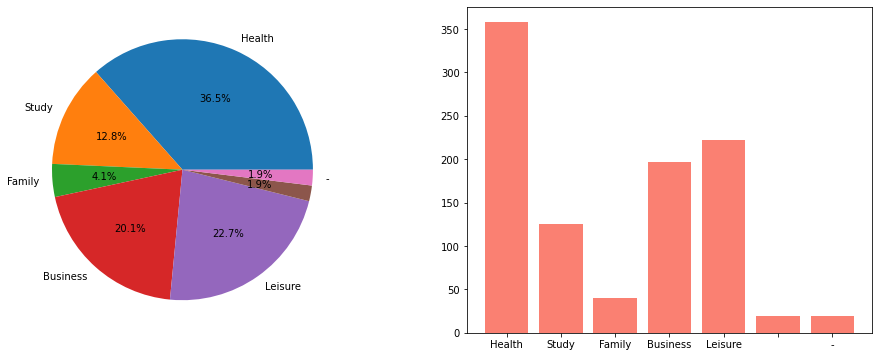

In [16]:
illustrate_qualitative_series(data['cat8_motivesForTravelling'])

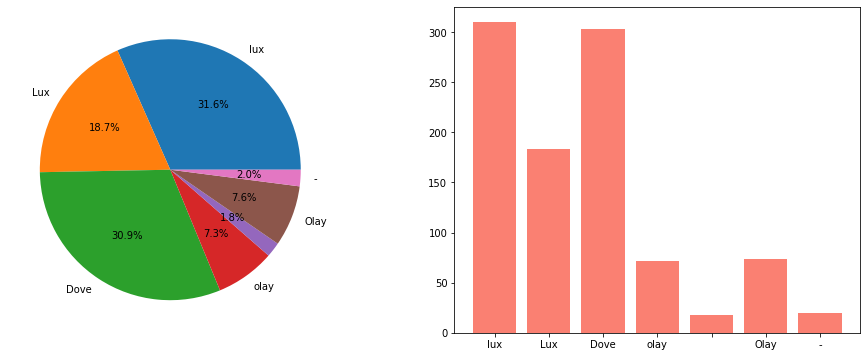

In [17]:
illustrate_qualitative_series(data['cat6_brandOfSoaps'])

## Проверка правдоподобности качественных признаков
Происходит проверка типов данных содержимого столбцов. Для количественных признаков типы данных "не строка" ненормальны.

In [29]:
set(data['cat8_motivesForTravelling'].apply(type))

{float, str}

In [30]:
set(data['cat6_brandOfSoaps'].apply(type))

{float, str}

Посмотрим, что именно является типа float

In [31]:
data.loc[map(lambda x: type(x) == float, data['cat8_motivesForTravelling'])]

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
81,NaN,Lux,585.301618,405.403835,116.31763
167,NaN,Dove,970.481588,NaN,98.781643
266,NaN,lux,991.491399,117.047388,123.439059
281,NaN,Olay,874.856641,135.033585,108.37574
285,NaN,Olay,773.759593,241.117750,104.16894
325,NaN,Dove,734.947639,486.293544,146.334279
395,NaN,olay,568.263886,-444.495952,119.936667
450,NaN,lux,1039.176332,53.374521,112.307951
548,NaN,Dove,748.488634,78.657205,125.045162
566,NaN,Dove,837.262125,237.519419,125.616384


In [32]:
data.loc[map(lambda x: type(x) == float, data['cat6_brandOfSoaps'])]

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
1,Study,NaN,720.562227,211.321139,98.26433
27,Family,NaN,721.378310,786.799176,61.739618
31,Business,NaN,671.141562,373.214024,130.665734
71,Family,NaN,943.024995,-79.796380,122.443513
80,Business,NaN,869.904838,109.165876,96.842188
146,Leisure,NaN,673.747121,490.985356,117.527444
166,Health,NaN,-9999.000000,362.774194,118.08955
170,Business,NaN,916.208900,8.146763,-
219,Health,NaN,882.306118,336.905153,101.632879
240,Health,NaN,1034.123081,286.065209,112.670652


Чтобы убрать предупреждения

In [33]:
data._is_copy = False

Анализируются все строки и убираются "ненормальные"

Первый качественный столбец

In [34]:
set(data['cat8_motivesForTravelling'])

{' ', '-', 'Business', 'Family', 'Health', 'Leisure', 'Study', nan}

In [35]:
data['cat8_motivesForTravelling'] = data['cat8_motivesForTravelling'].replace([' ', '-'], np.nan)

In [36]:
set(data['cat8_motivesForTravelling'])

{'Business', 'Family', 'Health', 'Leisure', 'Study', nan}

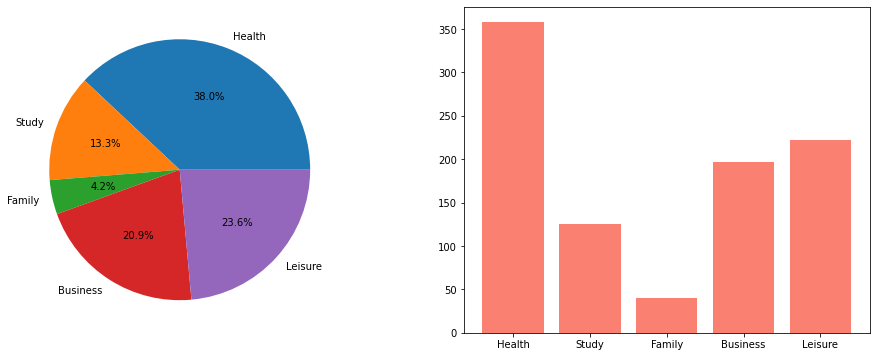

In [37]:
illustrate_qualitative_series(data['cat8_motivesForTravelling'])

Второй качественный столбец

In [38]:
set(data['cat6_brandOfSoaps'])

{' ', '-', 'Dove', 'Lux', 'Olay', 'lux', nan, 'olay'}

In [39]:
data['cat6_brandOfSoaps'] = data['cat6_brandOfSoaps'].replace([' ', '-'], np.nan)
data['cat6_brandOfSoaps'] = data['cat6_brandOfSoaps'].replace('lux', 'Lux')
data['cat6_brandOfSoaps'] = data['cat6_brandOfSoaps'].replace('olay', 'Olay')

In [40]:
set(data['cat6_brandOfSoaps'])

{'Dove', 'Lux', 'Olay', nan}

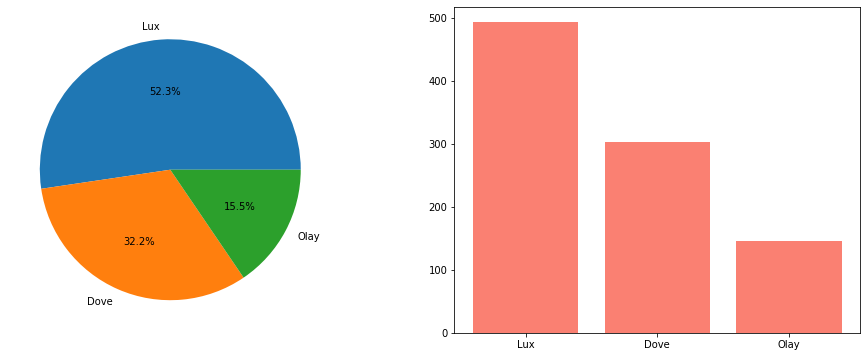

In [41]:
illustrate_qualitative_series(data['cat6_brandOfSoaps'])

## Проверка правдоподобности количественных признаков
Происходит оценка типов (правильные только float). Неадекватные значения (выбросы) исключаются в другом пункте.

In [44]:
set(data['num1_16'].apply(type))

{float}

In [43]:
set(data['num2_16'].apply(type))

{float}

In [45]:
set(data['num3_16'].apply(type))

{float, str}

Третий столбец мне не нравится

In [46]:
data.loc[map(lambda x: type(x) == str, data['num3_16'])]

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
8,Study,Dove,603.419710,258.788063,-
10,Health,Olay,822.783177,223.324197,-
21,Health,Olay,611.189094,195.884782,
32,Health,Olay,474.961771,114.719131,
47,Business,Dove,839.278202,589.744598,-
49,Business,Dove,616.568114,360.746376,-
97,Business,Dove,1078.517897,3.408460,-
105,Business,Olay,861.483372,437.685817,
122,Health,Olay,909.028866,93.331929,
136,Health,Lux,907.305819,63.712234,-


In [47]:
data['num3_16'] = data['num3_16'].replace([' ', '-'], np.nan)

In [48]:
set(data['num3_16'].apply(type))

{float}

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


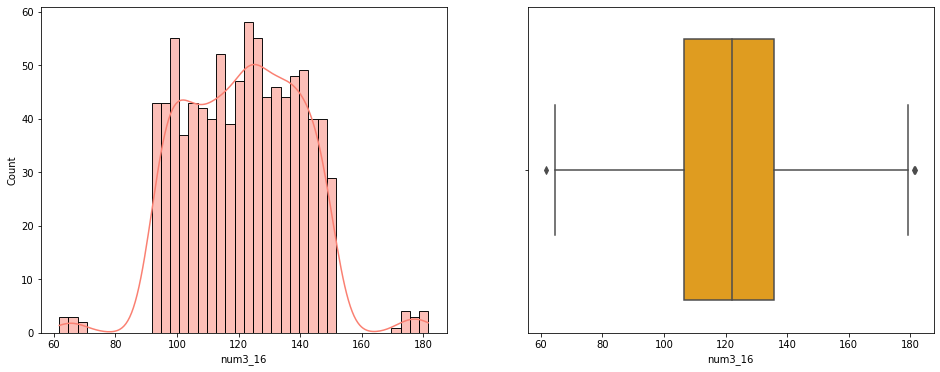

In [49]:
illustrate_quantity_series(data['num3_16'])

Преобразование столбиков к float

In [50]:
data['num1_16'] = data['num1_16'].astype(float)
data['num2_16'] = data['num2_16'].astype(float)
data['num3_16'] = data['num3_16'].astype(float)

## Восстановление пропущенных значений


### Для 2 столбца используется самое популярное значение:

In [51]:
set(data['cat6_brandOfSoaps'])

{'Dove', 'Lux', 'Olay', nan}

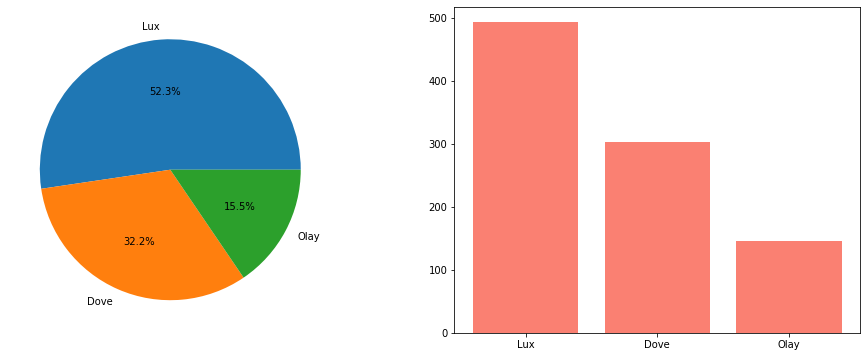

In [52]:
illustrate_qualitative_series(data['cat6_brandOfSoaps'])

In [53]:
mode = data['cat6_brandOfSoaps'].mode()[0]
data = data.fillna({'cat6_brandOfSoaps': mode})

In [54]:
set(data['cat6_brandOfSoaps'])

{'Dove', 'Lux', 'Olay'}

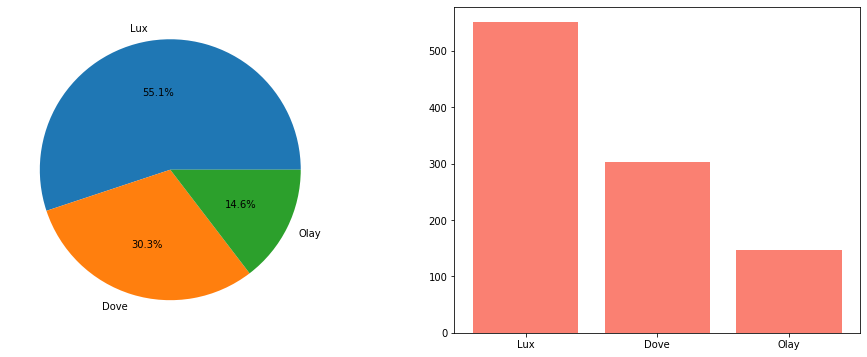

In [55]:
illustrate_qualitative_series(data['cat6_brandOfSoaps'])

### Для 3 – среднее:

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


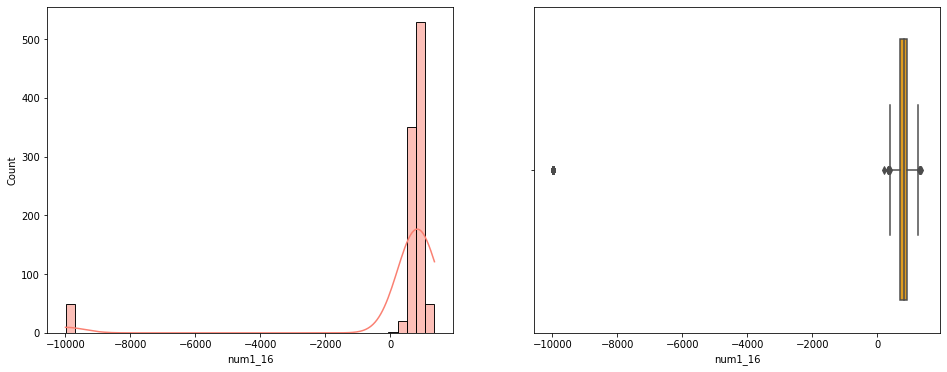

In [56]:
illustrate_quantity_series(data['num1_16'])

In [57]:
mean = data['num1_16'].mean()
data['num1_16'] = data['num1_16'].fillna(mean)

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


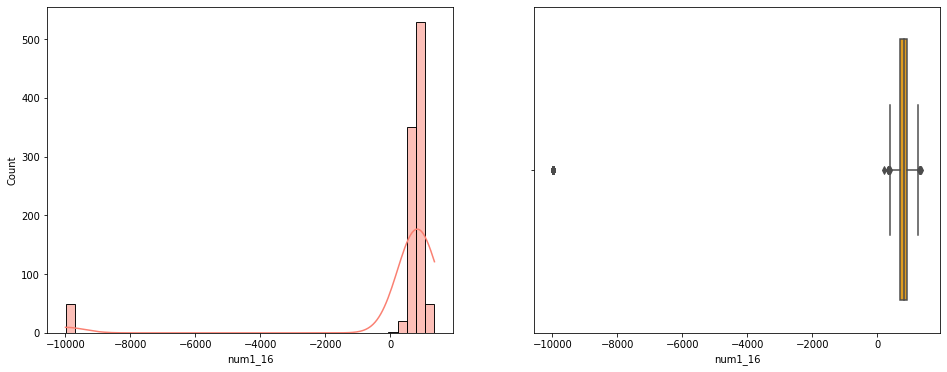

In [58]:
illustrate_quantity_series(data['num1_16'])

### Для 4 – медиана:

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


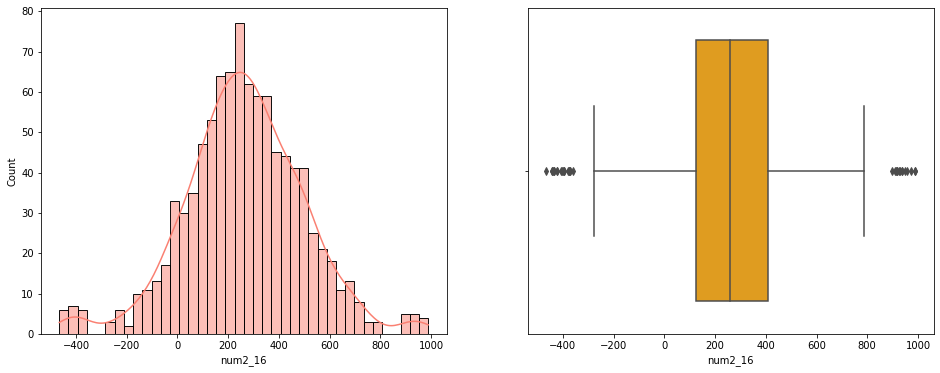

In [59]:
illustrate_quantity_series(data['num2_16'])

In [60]:
median = data['num2_16'].median()
data['num2_16'] = data['num2_16'].fillna(median)

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


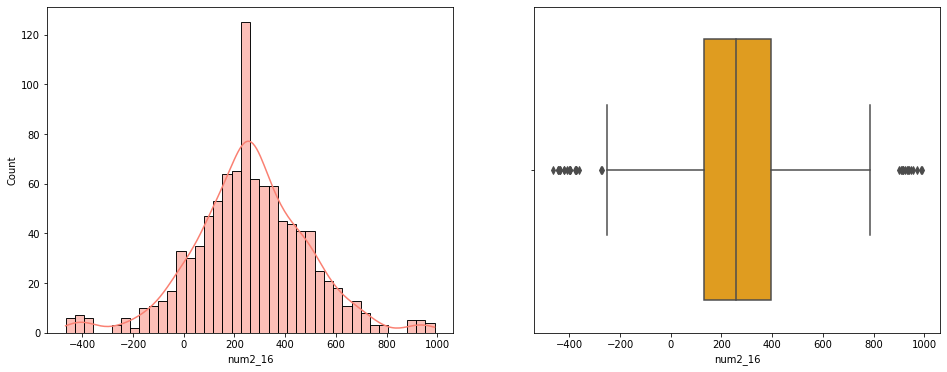

In [61]:
illustrate_quantity_series(data['num2_16'])

### Метод k-ближайших соседей для 1 и 5 столбца

In [62]:
data['cat8_motivesForTravelling'].value_counts(dropna=False)

Health      358
Leisure     222
Business    197
Study       125
NaN          58
Family       40
Name: cat8_motivesForTravelling, dtype: int64

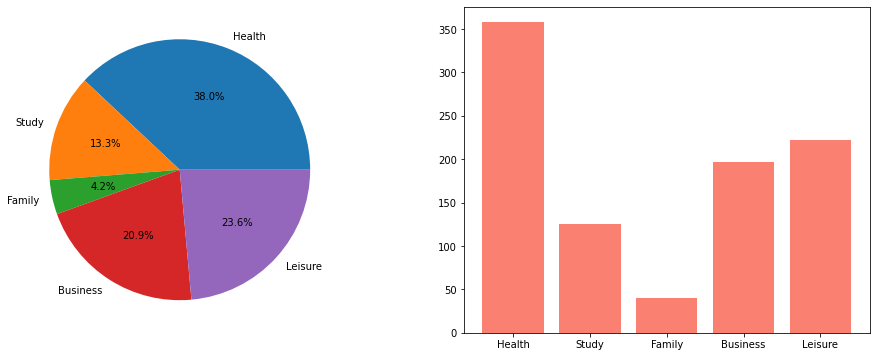

In [63]:
illustrate_qualitative_series(data['cat8_motivesForTravelling'])

In [64]:
tmp = pandas.get_dummies(data.cat8_motivesForTravelling, dummy_na=True)
data = pandas.concat([data, tmp], axis=1)

In [65]:
data

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16,Business,Family,Health,Leisure,Study,NaN
0,Health,Lux,873.769790,483.814054,116.806927,0,0,1,0,0,0
1,Study,Lux,720.562227,211.321139,98.264330,0,0,0,0,1,0
2,Family,Lux,1039.114671,244.149817,NaN,0,1,0,0,0,0
3,Health,Lux,712.038677,82.090022,116.613291,0,0,1,0,0,0
4,Health,Dove,864.677412,258.729918,146.187875,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Leisure,Dove,678.416987,258.729918,94.634025,0,0,0,1,0,0
996,Health,Lux,974.740058,259.813573,140.970704,0,0,1,0,0,0
997,Study,Dove,752.479092,87.352380,120.055689,0,0,0,0,1,0
998,Health,Lux,847.430677,296.909229,NaN,0,0,1,0,0,0


In [66]:
data.iloc[:, 5:]

,Business,Family,Health,Leisure,Study,NaN
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,1,0,0,0
997,0,0,0,0,1,0
998,0,0,1,0,0,0


Поиск индексов nanов

In [67]:
hot_columns = data.iloc[:, 5:].columns.to_list()
na_indexes = data.groupby([np.nan], dropna=False).groups[1]

In [68]:
na_indexes

Int64Index([ 81,  84, 120, 167, 186, 187, 214, 249, 253, 266, 277, 280, 281,
            285, 316, 322, 325, 330, 331, 343, 344, 345, 372, 374, 395, 419,
            424, 436, 450, 478, 510, 535, 548, 566, 567, 574, 589, 590, 592,
            621, 626, 634, 642, 656, 657, 684, 697, 717, 784, 803, 816, 842,
            852, 877, 891, 914, 963, 987],
           dtype='int64')

Замена всей строчки у OHE на np.nan, если у столбца np.nan значение 1

In [69]:
for col in data.iloc[:, 5:-1].columns:
    data[col] = np.where(data[col].index.isin(na_indexes), [np.nan], data[col])

In [70]:
data["Health"].value_counts(dropna=False)

0.0    584
1.0    358
NaN     58
Name: Health, dtype: int64

In [71]:
data[np.nan] = 0.

Сам метод ближайших соседей

In [72]:
imputer = KNNImputer(n_neighbors=19)
data.iloc[:, 5:] = pandas.DataFrame(imputer.fit_transform(data.iloc[:, 2:])).iloc[:, 3:]

In [73]:
data["Health"].value_counts(dropna=False)

0.000000    584
1.000000    358
0.368421     12
0.473684     11
0.421053     11
0.315789      8
0.526316      5
0.263158      5
0.210526      2
0.631579      2
0.578947      1
0.157895      1
Name: Health, dtype: int64

In [74]:
data.iloc[:, 5:]

,Business,Family,Health,Leisure,Study,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,1.0,0.0
998,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(data[['cat8_motivesForTravelling']])
data['cat8_motivesForTravelling'] = ohe.inverse_transform(data.iloc[:, 5:])

In [76]:
data['cat8_motivesForTravelling']

0       Health
1        Study
2       Family
3       Health
4       Health
        ...   
995    Leisure
996     Health
997      Study
998     Health
999     Family
Name: cat8_motivesForTravelling, Length: 1000, dtype: object

Удаление One-hot столбцов

In [77]:
data.drop(list(data)[5:], axis=1, inplace=True)

In [78]:
data

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
0,Health,Lux,873.769790,483.814054,116.806927
1,Study,Lux,720.562227,211.321139,98.264330
2,Family,Lux,1039.114671,244.149817,NaN
3,Health,Lux,712.038677,82.090022,116.613291
4,Health,Dove,864.677412,258.729918,146.187875
...,...,...,...,...,...
995,Leisure,Dove,678.416987,258.729918,94.634025
996,Health,Lux,974.740058,259.813573,140.970704
997,Study,Dove,752.479092,87.352380,120.055689
998,Health,Lux,847.430677,296.909229,NaN


Визуализация

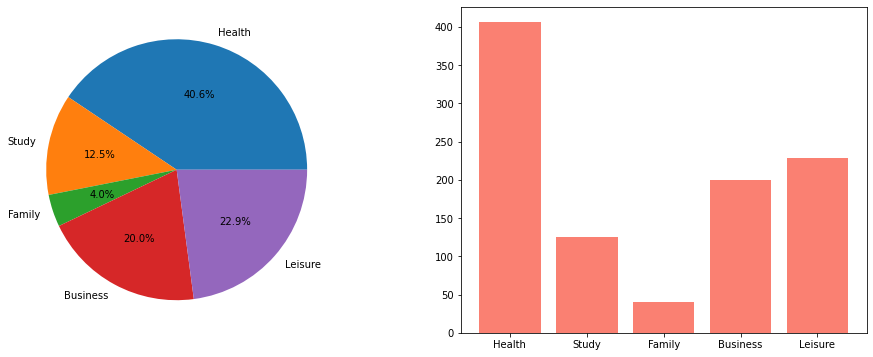

In [79]:
illustrate_qualitative_series(data['cat8_motivesForTravelling'])

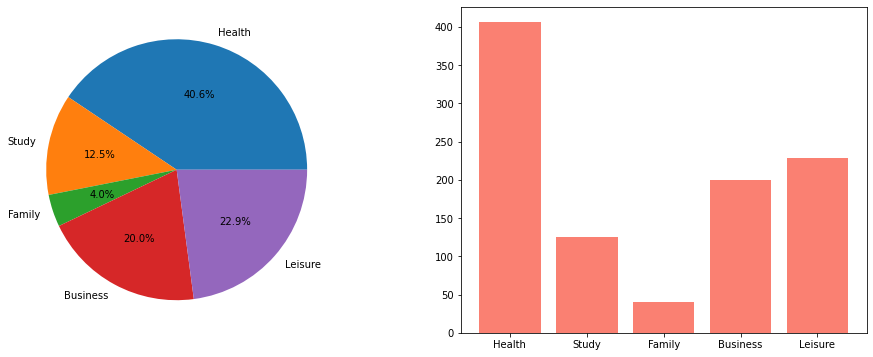

In [80]:
illustrate_qualitative_series(data['cat8_motivesForTravelling'])

## Поиск выбросов

Метод квартилей

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


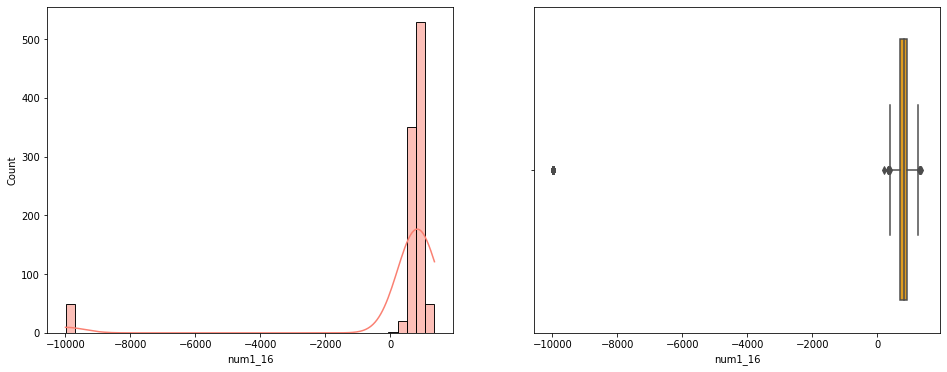

In [81]:
illustrate_quantity_series(data['num1_16'], bins_number=40)

In [82]:
def quartile_method(column: pandas.Series):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    
    return column[(column > (q1 - 1.5 * IQR)) & (column < (q3 + 1.5 * IQR))]

c:\users\alekc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


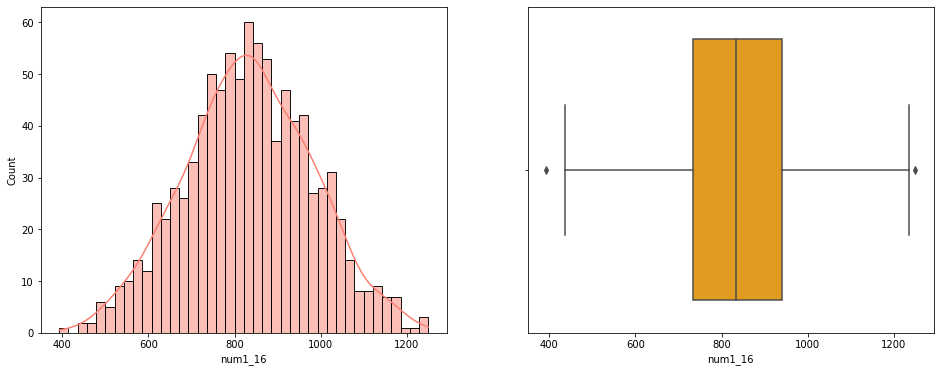

In [83]:
illustrate_quantity_series(quartile_method(data['num1_16']), bins_number=40)

Метод сигм

In [67]:
min_val = sigmaclip(data['num1_16'])[1]
max_val = sigmaclip(data['num1_16'])[2]

In [68]:
data[(data['num1_16'] >= min_val) & (data['num1_16'] < max_val)]

,cat8_motivesForTravelling,cat6_brandOfSoaps,num1_16,num2_16,num3_16
0,Health,Lux,873.769790,483.814054,116.806927
1,Study,Lux,720.562227,211.321139,98.264330
2,Family,Lux,1039.114671,244.149817,NaN
3,Health,Lux,712.038677,82.090022,116.613291
4,Health,Dove,864.677412,258.729918,146.187875
...,...,...,...,...,...
995,Leisure,Dove,678.416987,258.729918,94.634025
996,Health,Lux,974.740058,259.813573,140.970704
997,Study,Dove,752.479092,87.352380,120.055689
998,Health,Lux,847.430677,296.909229,NaN


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


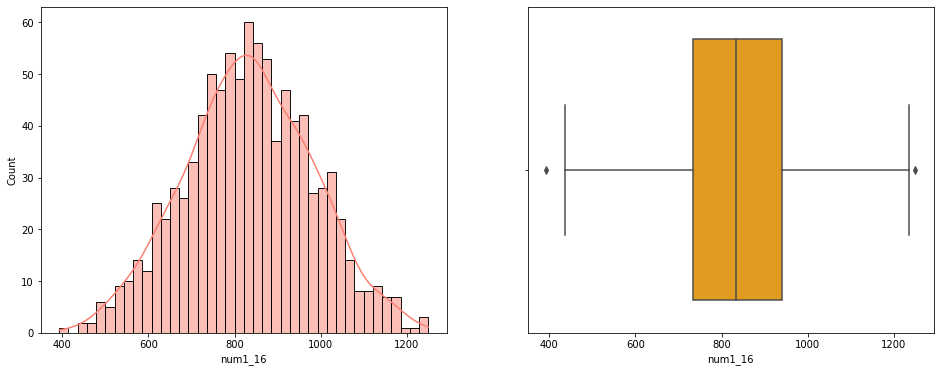

In [69]:
illustrate_quantity_series(quartile_method(data['num1_16']), bins_number=40)

## Преобразование данных

Нормализация количественных переменных

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
data[['num1_16', 'num2_16', 'num3_16']] = min_max_scaler.fit_transform(data[['num1_16', 'num2_16', 'num3_16']])

In [71]:
data[['num1_16', 'num2_16', 'num3_16']]

,num1_16,num2_16,num3_16
0,0.957020,0.652718,0.459491
1,0.943534,0.465423,0.304768
2,0.971573,0.487987,NaN
3,0.942784,0.376597,0.457875
4,0.956219,0.498009,0.704651
...,...,...,...
995,0.939825,0.498009,0.274477
996,0.965907,0.498754,0.661118
997,0.946344,0.380214,0.486599
998,0.954701,0.524251,NaN


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


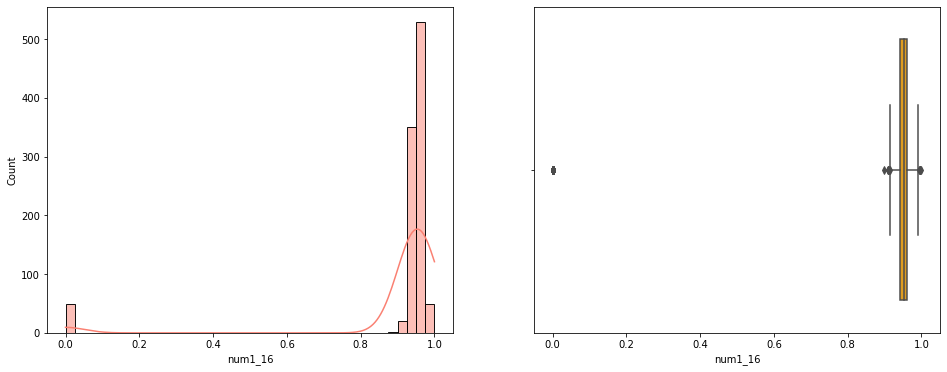

In [72]:
illustrate_quantity_series(data['num1_16'])

Стандартизация количественных переменных

In [73]:
standard_scaler = preprocessing.StandardScaler()
data[['num1_16', 'num2_16', 'num3_16']] = standard_scaler.fit_transform(data[['num1_16', 'num2_16', 'num3_16']])

In [74]:
data[['num1_16', 'num2_16', 'num3_16']]

,num1_16,num2_16,num3_16
0,0.243934,0.967802,-0.251658
1,0.178553,-0.227410,-1.254600
2,0.314495,-0.083416,NaN
3,0.174916,-0.794245,-0.262131
4,0.240054,-0.019465,1.337515
...,...,...,...
995,0.160568,-0.019465,-1.450958
996,0.287023,-0.014712,1.055326
997,0.192174,-0.771163,-0.075937
998,0.232694,0.147998,NaN


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


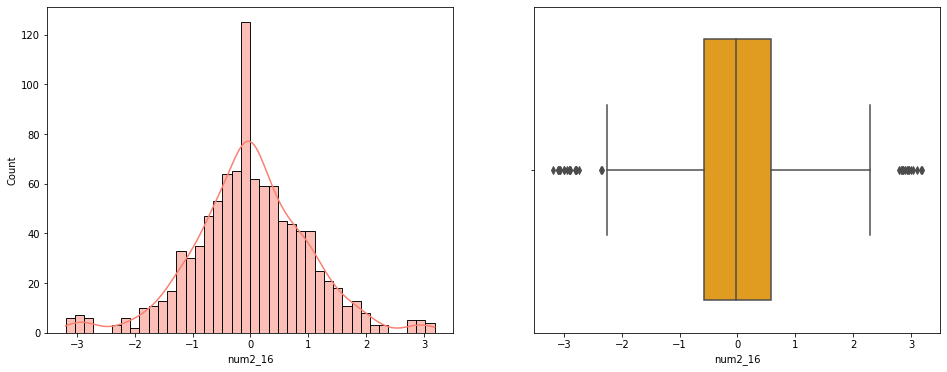

In [75]:
illustrate_quantity_series(data['num2_16'], bins_number=40)

One-hot encoding для первого качественного столбца

In [76]:
tmp = pandas.get_dummies(data.cat8_motivesForTravelling)
data = pandas.concat([data, tmp], axis=1)

In [77]:
del data['cat8_motivesForTravelling']

In [78]:
data

,cat6_brandOfSoaps,num1_16,num2_16,num3_16,Business,Family,Health,Leisure,Study
0,Lux,0.243934,0.967802,-0.251658,0,0,1,0,0
1,Lux,0.178553,-0.227410,-1.254600,0,0,0,0,1
2,Lux,0.314495,-0.083416,NaN,0,1,0,0,0
3,Lux,0.174916,-0.794245,-0.262131,0,0,1,0,0
4,Dove,0.240054,-0.019465,1.337515,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,Dove,0.160568,-0.019465,-1.450958,0,0,0,1,0
996,Lux,0.287023,-0.014712,1.055326,0,0,1,0,0
997,Dove,0.192174,-0.771163,-0.075937,0,0,0,0,1
998,Lux,0.232694,0.147998,NaN,0,0,1,0,0


Label-encoding для второго столбца

In [79]:
label_encoder = preprocessing.LabelEncoder()

data['cat6_brandOfSoaps'] = label_encoder.fit_transform(data['cat6_brandOfSoaps'])

In [80]:
data

,cat6_brandOfSoaps,num1_16,num2_16,num3_16,Business,Family,Health,Leisure,Study
0,1,0.243934,0.967802,-0.251658,0,0,1,0,0
1,1,0.178553,-0.227410,-1.254600,0,0,0,0,1
2,1,0.314495,-0.083416,NaN,0,1,0,0,0
3,1,0.174916,-0.794245,-0.262131,0,0,1,0,0
4,0,0.240054,-0.019465,1.337515,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0.160568,-0.019465,-1.450958,0,0,0,1,0
996,1,0.287023,-0.014712,1.055326,0,0,1,0,0
997,0,0.192174,-0.771163,-0.075937,0,0,0,0,1
998,1,0.232694,0.147998,NaN,0,0,1,0,0
